In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [21]:
digits = load_digits()
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape

(1257, 64)

In [19]:
#normalizziamo il dataset per riportare tutto sulla stessa scala essendo immagini
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)
loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))        #approssimo alla 4 cifra decimale
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))                #il modello non soffre di overfitting -> risultati buoni

ACCURACY: TRAIN=0.9912 TEST=0.9815
LOG LOSS: TRAIN=0.0289 TEST=0.1688


In [25]:
#valuto il modello per diversi valori di k
Ks = [1,2,3,4,5,7,10,12,15,20]
for k in Ks:
    print("K: " +str(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)

    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)

    accuracy_train = accuracy_score(Y_train, y_pred_train)
    accuracy_test = accuracy_score(Y_test, y_pred)
    loss_train = log_loss(Y_train, y_prob_train)
    loss_test = log_loss(Y_test, y_prob)

    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))        #approssimo alla 4 cifra decimale
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))                #il risultato migliore sembra essere per k=3

K: 1
ACCURACY: TRAIN=1.0000 TEST=0.9889
LOG LOSS: TRAIN=0.0000 TEST=0.4005
K: 2
ACCURACY: TRAIN=0.9897 TEST=0.9815
LOG LOSS: TRAIN=0.0083 TEST=0.2156
K: 3
ACCURACY: TRAIN=0.9912 TEST=0.9870
LOG LOSS: TRAIN=0.0157 TEST=0.1577
K: 4
ACCURACY: TRAIN=0.9905 TEST=0.9796
LOG LOSS: TRAIN=0.0224 TEST=0.1618
K: 5
ACCURACY: TRAIN=0.9912 TEST=0.9815
LOG LOSS: TRAIN=0.0289 TEST=0.1688
K: 7
ACCURACY: TRAIN=0.9897 TEST=0.9796
LOG LOSS: TRAIN=0.0411 TEST=0.1823
K: 10
ACCURACY: TRAIN=0.9841 TEST=0.9741
LOG LOSS: TRAIN=0.0568 TEST=0.1970
K: 12
ACCURACY: TRAIN=0.9809 TEST=0.9741
LOG LOSS: TRAIN=0.0661 TEST=0.1474
K: 15
ACCURACY: TRAIN=0.9817 TEST=0.9722
LOG LOSS: TRAIN=0.0809 TEST=0.1603
K: 20
ACCURACY: TRAIN=0.9761 TEST=0.9611
LOG LOSS: TRAIN=0.1065 TEST=0.1876


Numero 8 classificato come 3


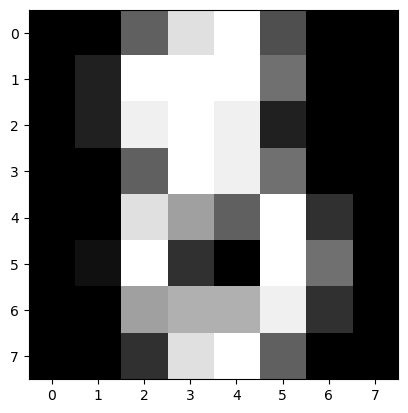

Numero 8 classificato come 3


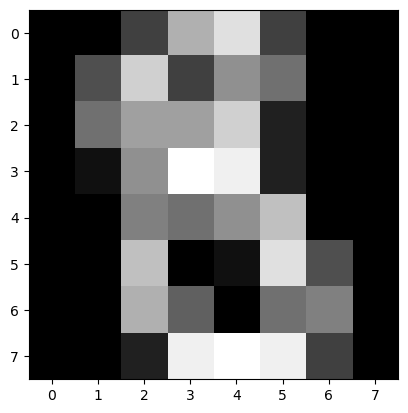

Numero 5 classificato come 9


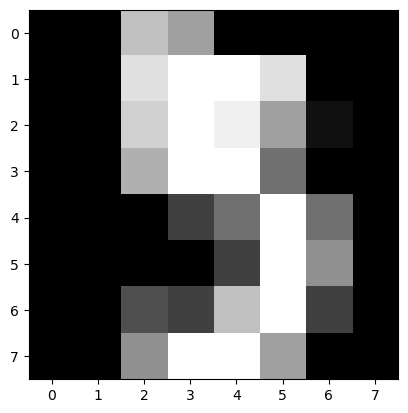

Numero 3 classificato come 2


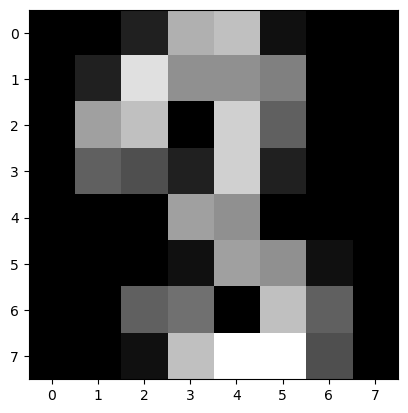

Numero 4 classificato come 7


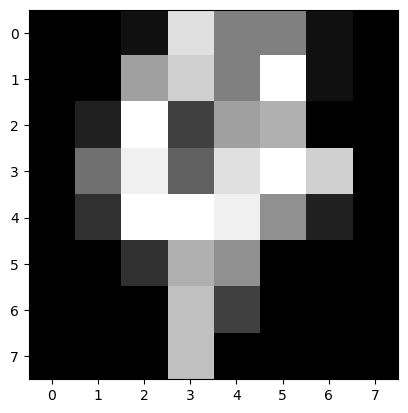

Numero 1 classificato come 5


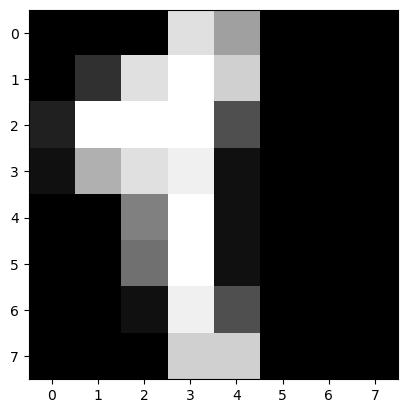

Numero 5 classificato come 6


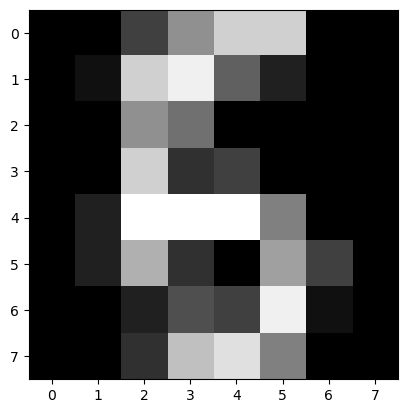

In [27]:
#valuto le immagini sbagliate dal modello per k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)            #predizioni sul test set
import matplotlib.pyplot as plt
for i in range(0, len(X_test)):         #ciclo sul test set
    if (Y_pred[i] != Y_test[i]):          #se la predizione non combacia con quella corretta -> è sbagliata
        print("Numero %d classificato come %d" %(Y_test[i], Y_pred[i]))
        plt.imshow(X_test[i].reshape([8,8]), cmap="grey")           #mostro l'immagine corrente in scala di grigi formato 8x8
        plt.show()